<a href="https://colab.research.google.com/github/ms624atyale/PictureBook_Archive_inProgress/blob/main/Prototype_TXT2CSV_LD_CCW_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **📕 Children's Picture Books**
 - #### Project Gutenberg
- #### 5 authors (Watty Piper, Beatrix Potter, Leslie Brooke, Walter Crane, Edward Lear)

### <font color = 'red'> **Original script for MK316's 📃 KSAT data process (as of 1005)**

## Read data file from Github, Add string length, Number of splitted words (N_Splits)

###🐹🐾 **1️⃣ Pandas Library**

In [11]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd #Import Pandas Package
import lexical_diversity as ld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 5.1 MB/s eta 0:00:00


###🐹🐾 **2️⃣ Clone a repository on your github**

In [2]:
!git clone 'https://github.com/ms624atyale/PictureBook_Archive_inProgress'

Cloning into 'PictureBook_Archive_inProgress'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 236 (delta 76), reused 50 (delta 50), pack-reused 134 (from 1)
Receiving objects: 100% (236/236), 5.29 MiB | 8.80 MiB/s, done.
Resolving deltas: 100% (133/133), done.


###🐹🐾 **3️⃣ Set your cuttent directory of your data folder where your txt file(s) are saved**

- convert your txt file to matrix using DataFrame( ) class
- set your current directory using %cd
- save your data with DataFrame configure to csv(comma separated values)

### 💣 <font color = 'red'> **Encoutering Duplicate row indices**
- You can get multiple 0s, which happens because when you load multiple files and concat() them, since Pandas keeps each original index unless told not to.



In [8]:
#💣 Run this code so that you may understand what the problem is...

%cd /content/PictureBook_Archive_inProgress/Data_Final

import glob
fns = glob.glob('*.txt')
df = pd.DataFrame()
for fn in fns:
  dftmp = pd.read_csv(fn, sep="@")
  df = pd.concat([df, dftmp])

%cd /content

df

print(df)

df.to_csv("./pg_all_txt_final.csv") #csv file saved in the  directory of Colab

/content/PictureBook_Archive_inProgress/Data_Final
/content
                                                text  \
0  nonsense books how pleasant to know mr. lear! ...   
0  “an alphabet of old friends a  a carrion crow ...   
1  the baby's opera  1. girls and boys come out t...   
2  “the baby’s own Aesop Aesop’s fables the fox &...   
3  the old english garden  a floral phantasy     ...   
0  there was once a sweet little maid who lived w...   
0  a carrion crow sat on an oak,   fol de riddle,...   
1  there was once a man who had three sons, the y...   
2  johnny crow would dig and sow  till he made a ...   
3  the man in the moon.             the man in th...   
0  one morning a little rabbit sat on a bank.  he...   
1  a farmyard tale     for     ralph and betsy   ...   
2  once upon a time there was a little girl calle...   
3  once upon a time there were four little rabbit...   
4  this is a tale about a tail--a tail that belon...   
5  once upon a time there were three little 

#💊 <font color = 'green'> **Avoid overlapping indecies**

In [14]:
import pandas as pd
import glob

# Change directory
%cd /content/PictureBook_Archive_inProgress/Data_Final

# Load all .txt files
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

# Go back to main directory
%cd /content

# Save as CSV
df.to_csv("./pg_all_txt_final.csv", index=False)

# Display the DataFrame
print(df)

/content/PictureBook_Archive_inProgress/Data_Final
/content
                                                 text  \
0   nonsense books how pleasant to know mr. lear! ...   
1   “an alphabet of old friends a  a carrion crow ...   
2   the baby's opera  1. girls and boys come out t...   
3   “the baby’s own Aesop Aesop’s fables the fox &...   
4   the old english garden  a floral phantasy     ...   
5   there was once a sweet little maid who lived w...   
6   a carrion crow sat on an oak,   fol de riddle,...   
7   there was once a man who had three sons, the y...   
8   johnny crow would dig and sow  till he made a ...   
9   the man in the moon.             the man in th...   
10  one morning a little rabbit sat on a bank.  he...   
11  a farmyard tale     for     ralph and betsy   ...   
12  once upon a time there was a little girl calle...   
13  once upon a time there were four little rabbit...   
14  this is a tale about a tail--a tail that belon...   
15  once upon a time there w

In [15]:
import pandas as pd
from lexical_diversity import lex_div as ld

# Load the CSV (skip if already loaded)
df = pd.read_csv("/content/pg_all_txt_final.csv", sep=",")

# Group all texts by author and concatenate them
author_texts = df.groupby("author")["text"].apply(lambda x: ' '.join(x)).reset_index()

# Compute MATTR for each author's combined text
author_texts["MATTR"] = author_texts["text"].apply(lambda x: ld.mattr(x.split(), 50))

# See the result
print(author_texts[["author", "MATTR"]])

            author     MATTR
0   beatrix potter  0.816288
1  beatrix potter   0.813210
2     edward lear   0.782083
3    leslie brooke  0.659761
4   leslie brooke   0.776384
5    walter crane   0.761545
6     watty piper   0.779017


💣 <font color = 'red'> ▶️ _Duplicate entries for authors like "beatrix potter" and "leslie brooke" — likely stems from inconsistent spelling or extra spaces in the "author" column._

>
###🍄
>
##🍓
>
# 🍎

# 💊 <font color = 'green'> **Group by Author and Calculate MATTR Once**

In [16]:
# Strip whitespace and convert to lowercase to standardize author names
df["author"] = df["author"].str.strip().str.lower()

# Group all texts by cleaned author names and concatenate them
author_texts = df.groupby("author")["text"].apply(lambda x: ' '.join(x)).reset_index()

# Calculate MATTR
author_texts["MATTR"] = author_texts["text"].apply(lambda x: ld.mattr(x.split(), 50))

# Show results
print(author_texts[["author", "MATTR"]])

           author     MATTR
0  beatrix potter  0.814522
1     edward lear  0.782083
2   leslie brooke  0.760799
3    walter crane  0.761545
4     watty piper  0.779017


###🐹🐾 **4️⃣ Locate integer index using iloc[[ ]], and specify row(s) by authors**

 4️⃣-1️⃣ BeatrixPotter

In [17]:
EdwardLear = df.iloc[0]
print(EdwardLear)
BeatrixPotter.to_csv("./EdwardLear.csv")

text      nonsense books how pleasant to know mr. lear! ...
title                                       nonsense books"
author                                          edward lear
Name: 0, dtype: object


 4️⃣-2️⃣ Walter Crane

In [19]:
WalterCrane = df.iloc[[1,2,3,4]]
print(WalterCrane)
WattyPiper.to_csv("./WalterCrane.csv")

                                                text  \
1  “an alphabet of old friends a  a carrion crow ...   
2  the baby's opera  1. girls and boys come out t...   
3  “the baby’s own Aesop Aesop’s fables the fox &...   
4  the old english garden  a floral phantasy     ...   

                                       title        author  
1                 an alphabet of old friends  walter crane  
2                           the baby's opera  walter crane  
3                   baby's own æsop's fables  walter crane  
4  a floral fantasy in an old english garden  walter crane  


 4️⃣-3️⃣ Watty Piper

In [20]:
WattyPiper = df.iloc[5]
print(WattyPiper)
WalterCrane.to_csv("./WattyPiper.csv")

text      there was once a sweet little maid who lived w...
title              little red riding hood and other stories
author                                          watty piper
Name: 5, dtype: object


 4️⃣-4️⃣ Leslie Brooke

In [21]:
LeslieBrooke = df.iloc[[6,7,8,9]]
print(LeslieBrooke)
LeslieBrooke.to_csv("./LeslieBrooke.csv")

                                                text                    title  \
6  a carrion crow sat on an oak,   fol de riddle,...  the tailor and the crow   
7  there was once a man who had three sons, the y...         the golden goose   
8  johnny crow would dig and sow  till he made a ...     johnny crow's garden   
9  the man in the moon.             the man in th...          a nursery rhyme   

          author  
6  leslie brooke  
7  leslie brooke  
8  leslie brooke  
9  leslie brooke  


4️⃣-5️⃣ Beatrix Potter

In [22]:
BeatrixPotter = df.iloc[[10, 11, 12, 13, 14, 15]]
print(BeatrixPotter)
EdwardLear.to_csv("./BeatrixPotter.csv")

                                                 text  \
10  one morning a little rabbit sat on a bank.  he...   
11  a farmyard tale     for     ralph and betsy   ...   
12  once upon a time there was a little girl calle...   
13  once upon a time there were four little rabbit...   
14  this is a tale about a tail--a tail that belon...   
15  once upon a time there were three little kitte...   

                                title          author  
10         the tale of benjamin bunny  beatrix potter  
11     the tale of jemima puddle-duck  beatrix potter  
12      the tale of mrs. tiggy-winkle  beatrix potter  
13  red riding hood and other stories  beatrix potter  
14        the tale of squirrel nutkin  beatrix potter  
15             the tale of tom kitten  beatrix potter  


###🐹🐾 **5️⃣  Download each csv files under Colab Files by author**
- Upload the csv files to your github Data_Final folder

###🐹🐾 **6️⃣  Open your csv file with raw at raw.githubusercontent.com and copy & paste the url**

In [23]:
url = "https://raw.githubusercontent.com/ms624atyale/PictureBook_Archive_inProgress/refs/heads/main/Data_Final/pg_all_5authors_final.csv"

df1 = pd.read_csv(url)

In [24]:
df1

,Unnamed: 0,text,title,author
0,0,one morning a little rabbit sat on a bank. he...,the tale of benjamin bunny,beatrix potter
1,1,a farmyard tale for ralph and betsy ...,the tale of jemima puddle-duck,beatrix potter
2,2,once upon a time there was a little girl calle...,the tale of mrs. tiggy-winkle,beatrix potter
3,3,once upon a time there were four little rabbit...,red riding hood and other stories,beatrix potter
4,4,this is a tale about a tail--a tail that belon...,the tale of squirrel nutkin,beatrix potter
5,5,once upon a time there were three little kitte...,the tale of tom kitten,beatrix potter
6,0,there was once a sweet little maid who lived w...,little red riding hood and other stories,watty piper
7,0,“an alphabet of old friends a a carrion crow ...,an alphabet of old friends,walter crane
8,1,the baby's opera 1. girls and boys come out t...,the baby's opera,walter crane
9,2,“the baby’s own Aesop Aesop’s fables the fox &...,baby's own æsop's fables,walter crane


In [25]:
df2 = df1

In [26]:
# Added column: String length
length = []

for i in range(0, len(df2['text'])):
  LEN = len(df2['text'][i])
  length.append(LEN)

df2['Data size'] = length
df2

,Unnamed: 0,text,title,author,Data size
0,0,one morning a little rabbit sat on a bank. he...,the tale of benjamin bunny,beatrix potter,6293
1,1,a farmyard tale for ralph and betsy ...,the tale of jemima puddle-duck,beatrix potter,7055
2,2,once upon a time there was a little girl calle...,the tale of mrs. tiggy-winkle,beatrix potter,7547
3,3,once upon a time there were four little rabbit...,red riding hood and other stories,beatrix potter,5172
4,4,this is a tale about a tail--a tail that belon...,the tale of squirrel nutkin,beatrix potter,6847
5,5,once upon a time there were three little kitte...,the tale of tom kitten,beatrix potter,3917
6,0,there was once a sweet little maid who lived w...,little red riding hood and other stories,watty piper,13999
7,0,“an alphabet of old friends a a carrion crow ...,an alphabet of old friends,walter crane,5027
8,1,the baby's opera 1. girls and boys come out t...,the baby's opera,walter crane,17189
9,2,“the baby’s own Aesop Aesop’s fables the fox &...,baby's own æsop's fables,walter crane,15364


In [27]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['text'])):
  TSP = df2['text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Splits'] = splen
df2

,Unnamed: 0,text,title,author,Data size,Splits,N_Splits
0,0,one morning a little rabbit sat on a bank. he...,the tale of benjamin bunny,beatrix potter,6293,"[one, morning, a, little, rabbit, sat, on, a, ...",1123
1,1,a farmyard tale for ralph and betsy ...,the tale of jemima puddle-duck,beatrix potter,7055,"[a, farmyard, tale, for, ralph, and, betsy, wh...",1252
2,2,once upon a time there was a little girl calle...,the tale of mrs. tiggy-winkle,beatrix potter,7547,"[once, upon, a, time, there, was, a, little, g...",1272
3,3,once upon a time there were four little rabbit...,red riding hood and other stories,beatrix potter,5172,"[once, upon, a, time, there, were, four, littl...",948
4,4,this is a tale about a tail--a tail that belon...,the tale of squirrel nutkin,beatrix potter,6847,"[this, is, a, tale, about, a, tail--a, tail, t...",1207
5,5,once upon a time there were three little kitte...,the tale of tom kitten,beatrix potter,3917,"[once, upon, a, time, there, were, three, litt...",691
6,0,there was once a sweet little maid who lived w...,little red riding hood and other stories,watty piper,13999,"[there, was, once, a, sweet, little, maid, who...",2654
7,0,“an alphabet of old friends a a carrion crow ...,an alphabet of old friends,walter crane,5027,"[“an, alphabet, of, old, friends, a, a, carrio...",925
8,1,the baby's opera 1. girls and boys come out t...,the baby's opera,walter crane,17189,"[the, baby's, opera, 1., girls, and, boys, com...",3066
9,2,“the baby’s own Aesop Aesop’s fables the fox &...,baby's own æsop's fables,walter crane,15364,"[“the, baby’s, own, Aesop, Aesop’s, fables, th...",2808


In [28]:
df2.describe()

,Unnamed: 0,Data size,N_Splits
count,16.000000,16.000000,16.000000
mean,1.687500,19053.375000,3195.875000
std,1.579821,43548.565519,6882.913132
min,0.000000,854.000000,153.000000
25%,0.000000,3993.500000,679.000000
50%,1.500000,6570.000000,1165.000000
75%,3.000000,14340.250000,2692.500000
max,5.000000,180413.000000,28542.000000


## **Lexical Diversity Indices (6 types)**

#### **Getting LD indices**

In [ ]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

In [29]:
# Added column: String length
lem = []

for i in range(0, len(df2['text'])):
  LEM = ld.flemmatize(df2['text'][i])
  print(LEM)
  lem.append(LEM)

df2['Lemma'] = lem

['one', 'morning', 'a', 'little', 'rabbit', 'sit', 'on', 'a', 'bank', 'he', 'prick', 'his', 'ear', 'and', 'listen', 'to', 'the', 'trittrot', 'trittrot', 'of', 'a', 'pony', 'a', 'gig', 'be', 'coming', 'along', 'the', 'road', 'it', 'be', 'drive', 'by', 'mr', 'mcgregor', 'and', 'beside', 'him', 'sit', 'mrs', 'mcgregor', 'in', 'her', 'best', 'bonnet', 'as', 'soon', 'as', 'they', 'have', 'pass', 'little', 'benjamin', 'bunny', 'slide', 'down', 'into', 'the', 'road', 'and', 'set', 'offwith', 'a', 'hop', 'skip', 'and', 'a', 'jumpto', 'call', 'upon', 'his', 'relation', 'who', 'live', 'in', 'the', 'wood', 'at', 'the', 'back', 'of', 'mr', 'mcgregors', 'garden', 'that', 'wood', 'be', 'full', 'of', 'rabbit', 'hole', 'and', 'in', 'the', 'neat', 'sandy', 'hole', 'of', 'all', 'live', 'benjamins', 'aunt', 'and', 'his', 'cousinsflopsy', 'mopsy', 'cottontail', 'and', 'peter', 'old', 'mrs', 'rabbit', 'be', 'a', 'widow', 'she', 'earn', 'her', 'living', 'by', 'knit', 'rabbitwool', 'mitten', 'and', 'muffatee

In [30]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []


# 2. Getting LD index values for each cell:

for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  mass = ld.maas_ttr(flt)
  msttr = ld.msttr(flt)
  mattr = ld.mattr(flt)


  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MassTTR.append(mass)
  MSTTR.append(msttr)
  MATTR.append(mattr)


# Add columns
df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MassTTR'] = MassTTR
df2['MSTTR'] = MSTTR
df2['MATTR'] = MATTR

###**Number of sentences**
- You should do this step before getting into Lexical Diversity analysi below since you need 'number of sentences' column label.

In [34]:
!pip install textstat
import textstat

In [36]:
df2['N_Sents'] = df2['text'].apply(textstat.sentence_count)
df2.to_csv('LD_result_with_Nsents.csv')

### **Lexical Diversity analysis: select TTR, MassTTR, MTLD, HDD**

In [37]:
df3 = df2
for col in df3.columns:
    print(col)

Unnamed: 0
text
title
author
Data size
Splits
N_Splits
Lemma
TTR
RTTR
LogTTR
MassTTR
MSTTR
MATTR
N_Sents


In [40]:
df3 = df2[['author','N_Splits','N_Sents','TTR','MATTR']]
df3.head(10)

,author,N_Splits,N_Sents,TTR,MATTR
0,beatrix potter,1123,78,0.322351,0.775307
1,beatrix potter,1252,90,0.340256,0.789842
2,beatrix potter,1272,88,0.337264,0.785315
3,beatrix potter,948,62,0.363924,0.798354
4,beatrix potter,1207,68,0.323944,0.781157
5,beatrix potter,691,51,0.383502,0.769969
6,watty piper,2654,135,0.223060,0.742587
7,walter crane,925,60,0.434595,0.718265
8,walter crane,3066,211,0.236791,0.667299
9,walter crane,2808,122,0.318732,0.771105


In [41]:
df3 = df2[['author','N_Splits','TTR','MATTR']]
df3.head(10)

,author,N_Splits,TTR,MATTR
0,beatrix potter,1123,0.322351,0.775307
1,beatrix potter,1252,0.340256,0.789842
2,beatrix potter,1272,0.337264,0.785315
3,beatrix potter,948,0.363924,0.798354
4,beatrix potter,1207,0.323944,0.781157
5,beatrix potter,691,0.383502,0.769969
6,watty piper,2654,0.223060,0.742587
7,walter crane,925,0.434595,0.718265
8,walter crane,3066,0.236791,0.667299
9,walter crane,2808,0.318732,0.771105


In [44]:
# Install required packages
!pip install lexical-diversity
!pip install textstat

# Import libraries
import pandas as pd
import nltk
from lexical_diversity import lex_div as ld
import textstat

# Download NLTK resources (just in case)
nltk.download('punkt')

# Load your dataset
df2 = pd.read_csv('/content/pg_all_txt_final.csv')

# --- Step 1: Lemmatization ---
lem = []
for i in range(len(df2['text'])):
    LEM = ld.flemmatize(df2['text'][i])
    lem.append(LEM)
df2['Lemma'] = lem

# --- Step 2: Calculate Lexical Diversity Metrics ---
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []

for i in range(len(df2['Lemma'])):
    flt = df2['Lemma'][i]
    TTR.append(ld.ttr(flt))
    RTTR.append(ld.root_ttr(flt))
    LogTTR.append(ld.log_ttr(flt))
    MassTTR.append(ld.maas_ttr(flt))
    MSTTR.append(ld.msttr(flt))
    MATTR.append(ld.mattr(flt))

df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MassTTR'] = MassTTR
df2['MSTTR'] = MSTTR
df2['MATTR'] = MATTR

# --- Step 3: Sentence Count ---
df2['N_Sents'] = df2['text'].apply(textstat.sentence_count)

# --- Step 4: Group by Author and Get Mean Values ---
df_author_ld = df2.groupby("author")[['N_Sents', 'TTR', 'RTTR', 'LogTTR', 'MassTTR', 'MSTTR', 'MATTR']].mean().reset_index()
df_author_ld = df_author_ld.round(6)

# --- Step 5: Save and Display ---
df_author_ld.to_csv('LD_by_author.csv', index=False)
print("✅ Lexical diversity by author saved as 'LD_by_author.csv'!\n")
print(df_author_ld)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Lexical diversity by author saved as 'LD_by_author.csv'!

            author      N_Sents       TTR       RTTR    LogTTR   MassTTR  \
0   beatrix potter    70.250000  0.352508  11.031997  0.848403  0.050700   
1  beatrix potter     78.000000  0.330604  11.641491  0.844551  0.050261   
2     edward lear   1339.000000  0.139979  23.647749  0.808339  0.043017   
3    leslie brooke    20.666667  0.407381   6.875375  0.834291  0.070375   
4   leslie brooke    234.000000  0.155395  11.114805  0.781996  0.058778   
5    walter crane    105.750000  0.391386  14.452574  0.867269  0.041199   
6     watty piper    135.000000  0.223060  11.491355  0.809697  0.055581   

      MSTTR     MATTR  
0  0.780271  0.783368  
1  0.779950  0.783236  
2  0.745368  0.745887  
3  0.613889  0.617661  
4  0.723725  0.726363  
5  0.749257  0.749176  
6  0.745283  0.742587  


In [45]:
# Install required packages
!pip install lexical-diversity
!pip install textstat

# Import libraries
import pandas as pd
import nltk
from lexical_diversity import lex_div as ld
import textstat

# Download NLTK resources
nltk.download('punkt')

# Load dataset
df2 = pd.read_csv('/content/pg_all_txt_final.csv')

# --- STEP 1: Clean and standardize author names ---
df2['author'] = df2['author'].str.strip().str.lower()

# --- STEP 2: Lemmatization ---
lem = []
for i in range(len(df2['text'])):
    LEM = ld.flemmatize(df2['text'][i])
    lem.append(LEM)
df2['Lemma'] = lem

# --- STEP 3: Calculate Lexical Diversity Metrics ---
TTR, RTTR, LogTTR, MassTTR, MSTTR, MATTR = [], [], [], [], [], []
for flt in df2['Lemma']:
    TTR.append(ld.ttr(flt))
    RTTR.append(ld.root_ttr(flt))
    LogTTR.append(ld.log_ttr(flt))
    MassTTR.append(ld.maas_ttr(flt))
    MSTTR.append(ld.msttr(flt))
    MATTR.append(ld.mattr(flt))

df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MassTTR'] = MassTTR
df2['MSTTR'] = MSTTR
df2['MATTR'] = MATTR

# --- STEP 4: Sentence Count ---
df2['N_Sents'] = df2['text'].apply(textstat.sentence_count)

# --- STEP 5: Group by unique authors and average the results ---
df_author_ld = df2.groupby("author")[['N_Sents', 'TTR', 'RTTR', 'LogTTR', 'MassTTR', 'MSTTR', 'MATTR']].mean().reset_index()
df_author_ld = df_author_ld.round(6)

# --- STEP 6: Save and display results ---
df_author_ld.to_csv('LD_by_author.csv', index=False)
print("✅ Lexical diversity by author saved as 'LD_by_author.csv'!\n")
print(df_author_ld)

✅ Lexical diversity by author saved as 'LD_by_author.csv'!

           author      N_Sents       TTR       RTTR    LogTTR   MassTTR  \
0  beatrix potter    72.833333  0.345207  11.235162  0.847119  0.050554   
1     edward lear  1339.000000  0.139979  23.647749  0.808339  0.043017   
2   leslie brooke    74.000000  0.344385   7.935233  0.821217  0.067476   
3    walter crane   105.750000  0.391386  14.452574  0.867269  0.041199   
4     watty piper   135.000000  0.223060  11.491355  0.809697  0.055581   

      MSTTR     MATTR  
0  0.780164  0.783324  
1  0.745368  0.745887  
2  0.641348  0.644836  
3  0.749257  0.749176  
4  0.745283  0.742587  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The issue is caused by inconsistent capitalization or extra spaces in the author column (e.g., "Beatrix Potter" vs "beatrix potter"). Let’s clean the author names first so they’re standardized, and then calculate the lexical diversity per unique author properly.

df2['author'].str.strip().str.lower() ensures all author names are lowercase and have no leading/trailing spaces.

Grouping by cleaned names avoids duplicate entries like beatrix potter and Beatrix Potter.

#**Getting Commone Core Words**

In [42]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset
file_path = "picture_books.csv"  # Change to your actual file name
df = pd.read_csv('/content/pg_all_txt_final.csv')

# Ensure the text column exists
if 'text' not in df.columns or 'author' not in df.columns:
    raise ValueError("CSV file must contain 'text' and 'author' columns.")

# Combine all text data into one large string
all_text = " ".join(df['text'].astype(str))

# Tokenize words
words = word_tokenize(all_text.lower())  # Convert to lowercase

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]  # Keep only words, no numbers/symbols

# Count word frequencies
word_counts = Counter(words)

# Convert to a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Frequency'])  # Top 100 words

# Save to CSV
common_words_df.to_csv("5authors_common_core_words.csv", index=False)

print("Common core words extracted and saved as '5authors_common_core_words.csv'!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Common core words extracted and saved as '5authors_common_core_words.csv'!


In [43]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
import os

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('/content/pg_all_txt_final.csv')

# Clean author names for grouping
df["author"] = df["author"].str.strip().str.lower()

# Prepare stopwords
stop_words = set(stopwords.words('english'))

# Create a directory to save files (optional)
os.makedirs("core_words_by_author", exist_ok=True)

# Loop through each author
for author, group in df.groupby("author"):
    all_text = " ".join(group['text'].astype(str)).lower()
    words = word_tokenize(all_text)

    # Filter words: keep only alphabetic and not in stopwords
    words = [word for word in words if word.isalpha() and word not in stop_words]

    # Count word frequencies
    word_counts = Counter(words)
    common_words_df = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Frequency'])

    # Save to CSV
    safe_author_name = author.replace(" ", "_")
    filename = f"core_words_by_author/{safe_author_name}_common_words.csv"
    common_words_df.to_csv(filename, index=False)
    print(f"Saved common words for {author} → {filename}")

print("✅ All authors processed!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saved common words for beatrix potter → core_words_by_author/beatrix_potter_common_words.csv
Saved common words for edward lear → core_words_by_author/edward_lear_common_words.csv
Saved common words for leslie brooke → core_words_by_author/leslie_brooke_common_words.csv
Saved common words for walter crane → core_words_by_author/walter_crane_common_words.csv
Saved common words for watty piper → core_words_by_author/watty_piper_common_words.csv
✅ All authors processed!


# **Plotting**

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns

💊 I check whether Edward Lear is numeric data since it was not shown in the graph below. The reason was the y-limit outside of the y-axis range. So I change the value from 9,000 to 30,000.

In [63]:
#Check the data type of 'N_Splits' column and make it sure it's numeric.
print(df3.dtypes)

#If N_Splits is a string or contains missing values (NaN), Seaborn may ignore the entire row.
#To fix it:
df3['N_Splits'] = pd.to_numeric(df3['N_Splits'], errors='coerce')

#Check if Edward Lear has N_Splits values
print(df3[df3['author'] == 'Edward Lear'])

#🛠 Optional Fix: Drop rows with missing values (after warning)
#df3 = df3.dropna(subset=['N_Splits'])

author       object
N_Splits      int64
TTR         float64
MATTR       float64
dtype: object
         author  N_Splits       TTR     MATTR
15  Edward Lear     28542  0.139979  0.745887


<ipython-input-63-905e6f6bf253>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['N_Splits'] = pd.to_numeric(df3['N_Splits'], errors='coerce')


<ipython-input-64-044aa91acf62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['author'] = df3['author'].str.strip().str.title()


['Beatrix Potter' 'Watty Piper' 'Walter Crane' 'Leslie Brooke'
 'Edward Lear']


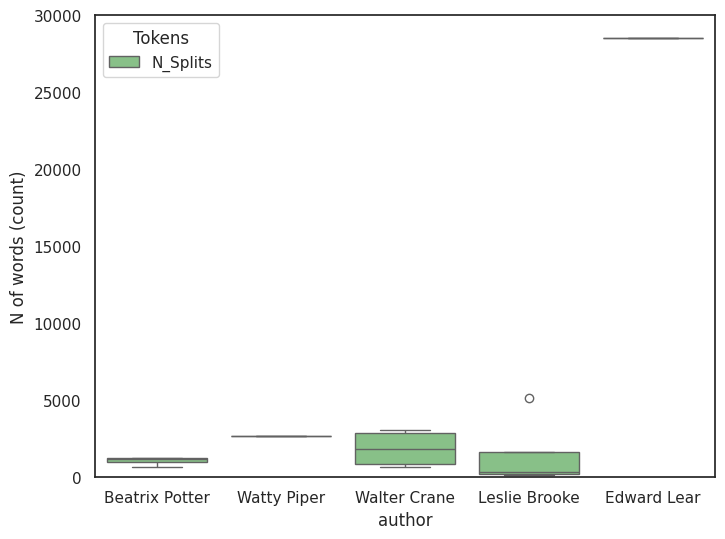

In [64]:


# 💊 Step 1: Clean author names to avoid duplicates
df3['author'] = df3['author'].str.strip().str.title()

# 💊 Checking any author is not missing... Double-check if any author is present in df3
print(df3['author'].unique())

sns.set(rc={'figure.figsize':(8,6),"font.size":40,"axes.titlesize":140,"axes.labelsize":60},style="white") # font size doesn't work
# ax = sns.boxplot (y=df2)
# ax.set_ylim([0, 30000])

sns.set_theme(style='white')
dd=pd.melt(df3,id_vars=['author'],value_vars=['N_Splits'],var_name='Tokens') #🆘 Oiginal id_vars=['author'] from previous version
ax = sns.boxplot(x='author',y='value',data=dd,hue='Tokens',palette="Accent") #🆘 Oiginal x ='author' from previous version
ax.set_ylim([0,30000])
ax.set(xlabel='author', ylabel='N of words (count)') #🆘 Oiginal x ='author' from previous version
plt.savefig('boxplot_Nsplit.png')


<ipython-input-65-cd49e644d7f7>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='N_Splits', data=df3, hue='author', common_norm=False); #🆘 Oiginal hue = 'author' from previous version


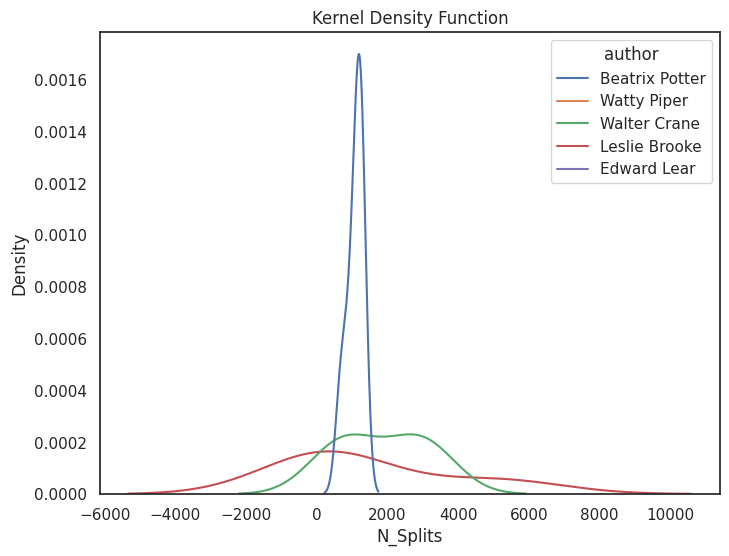

In [65]:
sns.kdeplot(x='N_Splits', data=df3, hue='author', common_norm=False); #🆘 Oiginal hue = 'author' from previous version
plt.title("Kernel Density Function")
plt.savefig('Density_Nsplit.png')

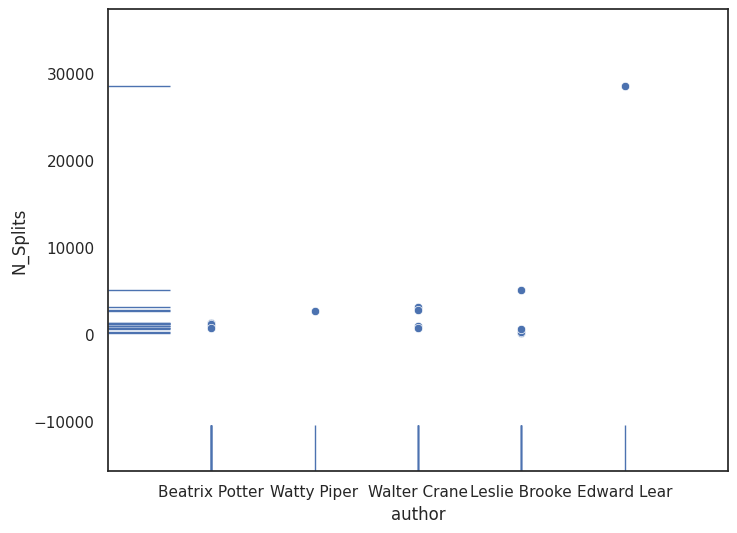

In [66]:
sns.scatterplot(data=df3, x="author", y="N_Splits") #🆘 Oiginal x = 'author' from previous version
sns.rugplot(data=df3, x="author", y="N_Splits", height=.1) #🆘 Oiginal x = 'author' from previous version
plt.savefig('Rug_Nsplit.png')

**문항(장???)별 어휘수 및 문장수**

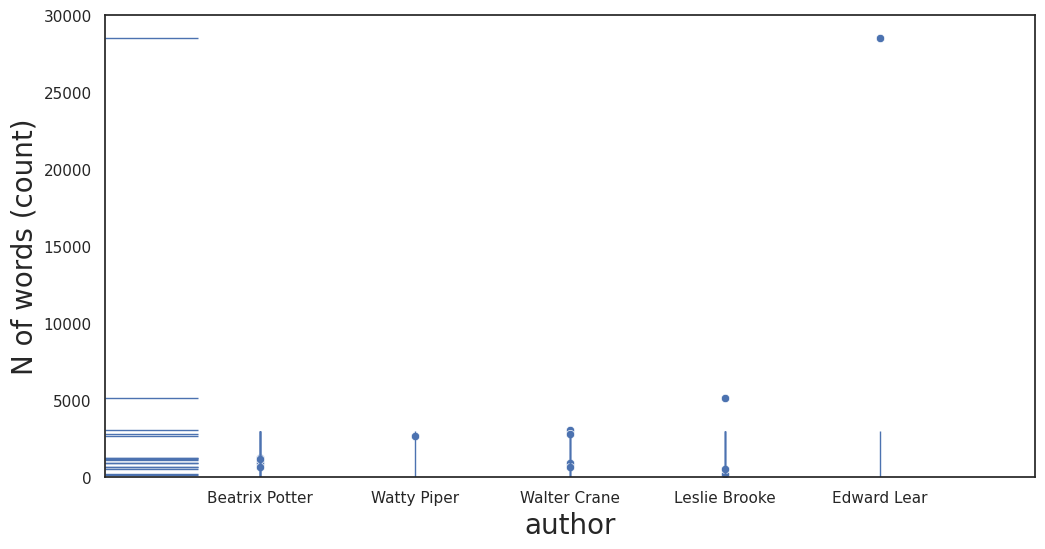

In [68]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df3, x="author", y="N_Splits") #🆘 Oiginal x = 'author' from previous version
ax = sns.rugplot(data=df3, x="author", y="N_Splits", height=.1) #🆘 Oiginal x = 'author' from previous version
ax.set_ylim([0,30000])
ax.set(xlabel='author', ylabel='N of words (count)')
plt.savefig('Rug_Nsplit_byYearPublished.png')